In [35]:
using Pkg; Pkg.activate(".")
using TSO
using PyPlot

  Activating environment at `/usr/local/autofs.shared/shared-storage/eitner/TS_opacity_tables/TSO.jl/examples/converting_tables/Project.toml`


# TurboS table for comparison

In [36]:
eosTSO       = TSO.reload(TSO.SqEoS, "../../../create_tables/TSO_sun_Magg_v3.1/eos.hdf5")
opacitiesTSO = TSO.reload(TSO.SqOpacity, "../../../create_tables/TSO_sun_Magg_v3.1/binned_opacities.hdf5");

# Read the AESOPUS tables for comparison

In [37]:
eosAESO   = TSO.AesopusEoS("eos_z0.0165_x0.7_MBS22_n1458.h5");
eosAESO_e = TSO.energy_grid(eosAESO);

# Compare the EoS

In [38]:
get_closest(a, b) = argmin(abs.(a .- b)) 

get_closest (generic function with 1 method)

In [ ]:
rho_test = 1e-8
iTSO  = get_closest(eosTSO.lnRho,  log(rho_test))
iAESO = get_closest(eosAESO.lnRho, log(rho_test));

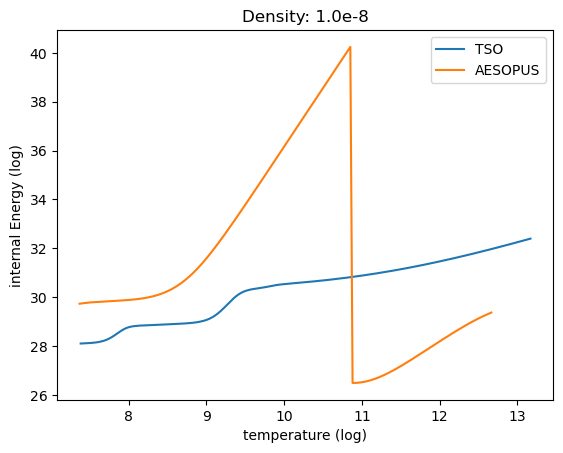

In [39]:
close()

f, ax = plt.subplots(1, 1)

ax.plot(eosTSO.lnT[:, iTSO], eosTSO.lnEi, label="TSO")
ax.plot(eosAESO.lnT, eosAESO.lnEi[:, iAESO], label="AESOPUS")

ax.set_title("Density: $(rho_test)")
ax.set_ylabel("internal Energy (log)")
ax.set_xlabel("temperature (log)")

ax.legend()

gcf()

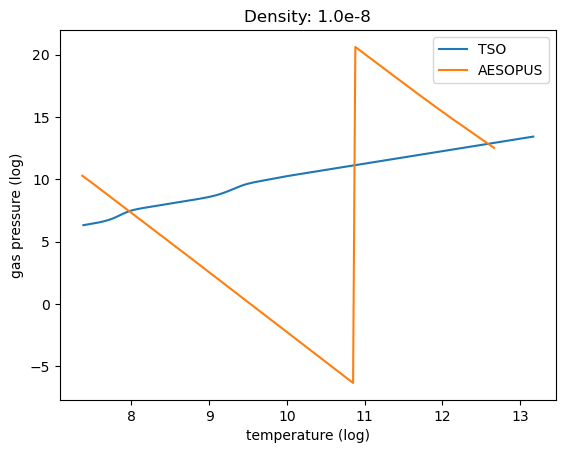

In [40]:
close()

f, ax = plt.subplots(1, 1)

ax.plot(eosTSO.lnT[:, iTSO], eosTSO.lnPg[:, iTSO], label="TSO")
ax.plot(eosAESO.lnT, eosAESO.lnPg[:, iAESO], label="AESOPUS")

ax.set_title("Density: $(rho_test)")
ax.set_ylabel("gas pressure (log)")
ax.set_xlabel("temperature (log)")

ax.legend()

gcf()

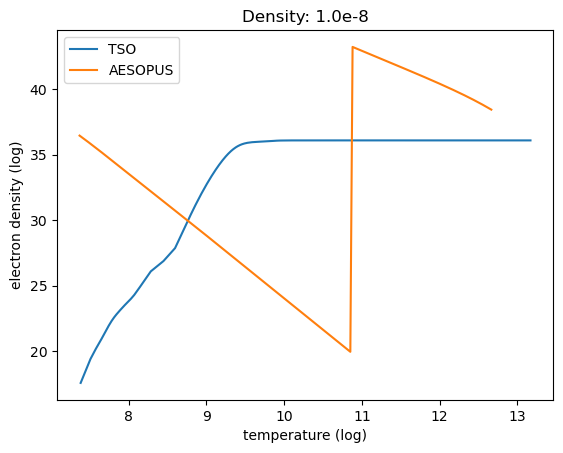

In [41]:
close()

f, ax = plt.subplots(1, 1)

ax.plot(eosTSO.lnT[:, iTSO], eosTSO.lnNe[:, iTSO], label="TSO")
ax.plot(eosAESO.lnT, eosAESO.lnNe[:, iAESO], label="AESOPUS")

ax.set_title("Density: $(rho_test)")
ax.set_ylabel("electron density (log)")
ax.set_xlabel("temperature (log)")

ax.legend()

gcf()